In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
!

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,variable,Temperature,Relative Humidity,Precipitation Total,Snowfall Amount,Evapotranspiration,Wind Speed,Wind Direction,Soil Temperature,Soil Moisture,Drought
0,20201031,22.257973,84,0.0,0,0.0,6.479999,360.00000,22.529999,0.312,3
1,20201031,21.957972,79,0.0,0,0.0,7.952660,354.80560,22.240020,0.311,3
2,20201031,21.677973,77,0.0,0,0.0,8.350138,352.56860,21.970001,0.311,3
3,20201031,21.427973,76,0.0,0,0.0,8.049845,349.69516,21.679993,0.311,3
4,20201031,21.147972,76,0.0,0,0.0,7.342588,348.69006,21.399994,0.310,3


In [4]:
features = df[['variable', 'Temperature','Relative Humidity','Precipitation Total', 'Snowfall Amount', 'Evapotranspiration','Wind Speed','Wind Direction','Soil Temperature','Soil Moisture']]
target = df['Drought']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['Drought']

In [5]:
acc = []
model = []
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [39]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(Xtrain,Ytrain, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(Xtrain,Ytrain,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(Xtest)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(Xtest, Ytest,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, y_pred)

ValueError: ignored

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))


DecisionTrees's Accuracy is:  95.83333333333334
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        25
           4       0.67      1.00      0.80         4
           5       1.00      0.78      0.88         9

    accuracy                           0.96        72
   macro avg       0.92      0.94      0.92        72
weighted avg       0.97      0.96      0.96        72



In [16]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
filename = 'decision.pkl'
# Open the file to save as pkl file
Model = open(filename, 'wb')
pickle.dump(DecisionTree, Model)
# Close the pickle instances
Model.close()

In [21]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree,features,target,cv=5)
score

array([0.93055556, 0.83333333, 0.95833333, 0.98611111, 0.88888889])

In [42]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(Xtrain,Ytrain);

In [46]:
predictions = rf.predict(Xtest)
# Calculate the absolute errors
errors = abs(predictions - Ytest)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / Ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.04 degrees.
Accuracy: 98.96 %.


In [23]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.75
              precision    recall  f1-score   support

           1       0.76      0.89      0.82        18
           2       0.73      0.50      0.59        16
           3       0.83      0.76      0.79        25
           4       0.33      0.75      0.46         4
           5       1.00      0.89      0.94         9

    accuracy                           0.75        72
   macro avg       0.73      0.76      0.72        72
weighted avg       0.78      0.75      0.75        72



In [25]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.43055556, 0.68055556, 0.76388889, 0.80555556, 0.80555556])

In [26]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.5972222222222222
              precision    recall  f1-score   support

           1       0.43      0.89      0.58        18
           2       0.50      0.19      0.27        16
           3       0.81      0.68      0.74        25
           4       0.67      0.50      0.57         4
           5       1.00      0.56      0.71         9

    accuracy                           0.60        72
   macro avg       0.68      0.56      0.58        72
weighted avg       0.66      0.60      0.58        72



In [27]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.375     , 0.55555556, 0.72222222, 0.63888889, 0.5       ])

In [28]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.25
              precision    recall  f1-score   support

           1       0.25      1.00      0.40        18
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.25        72
   macro avg       0.05      0.20      0.08        72
weighted avg       0.06      0.25      0.10        72



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.31944444, 0.33333333, 0.33333333, 0.31944444, 0.31944444])

In [7]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


XGBoost's Accuracy is:  0.9722222222222222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        25
           4       0.67      1.00      0.80         4
           5       1.00      0.78      0.88         9

    accuracy                           0.97        72
   macro avg       0.93      0.96      0.93        72
weighted avg       0.98      0.97      0.97        72



In [11]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
filename = 'xgboost.pkl'
# Open the file to save as pkl file
Model = open(filename, 'wb')
pickle.dump(XB, Model)
# Close the pickle instances
Model.close()

In [21]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [31]:
score = cross_val_score(XB,features,target,cv=5)
score

array([0.93055556, 0.93055556, 0.95833333, 0.98611111, 0.88888889])

In [12]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(Xtrain,Ytrain)

predicted_values = regressor.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

data = [[20201130,23,32,24,0,53,34,344,23,0.3]]
df = pd.DataFrame(data, columns = ['variable', 'Temperature','Relative Humidity','Precipitation Total', 'Snowfall Amount', 'Evapotranspiration','Wind Speed','Wind Direction','Soil Temperature','Soil Moisture'])
h=regressor.predict(data)
print(h)

RF's Accuracy is:  0.9583333333333334
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        16
           3       0.96      1.00      0.98        25
           4       0.75      0.75      0.75         4
           5       1.00      0.89      0.94         9

    accuracy                           0.96        72
   macro avg       0.93      0.92      0.92        72
weighted avg       0.96      0.96      0.96        72

[2]


In [13]:
data = [[20201130,23,32,24,0,53,34,344,23,0.3]]
df = pd.DataFrame(data, columns = ['variable', 'Temperature','Relative Humidity','Precipitation Total', 'Snowfall Amount', 'Evapotranspiration','Wind Speed','Wind Direction','Soil Temperature','Soil Moisture'])
h=regressor.predict(data)
print(h)

[2]


In [10]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
filename = 'random.pkl'
# Open the file to save as pkl file
Model = open(filename, 'wb')
pickle.dump(regressor, Model)
# Close the pickle instances
Model.close()

In [33]:
score = cross_val_score(regressor,features,target,cv=5)
score

array([0.83333333, 0.95833333, 0.95833333, 1.        , 0.875     ])

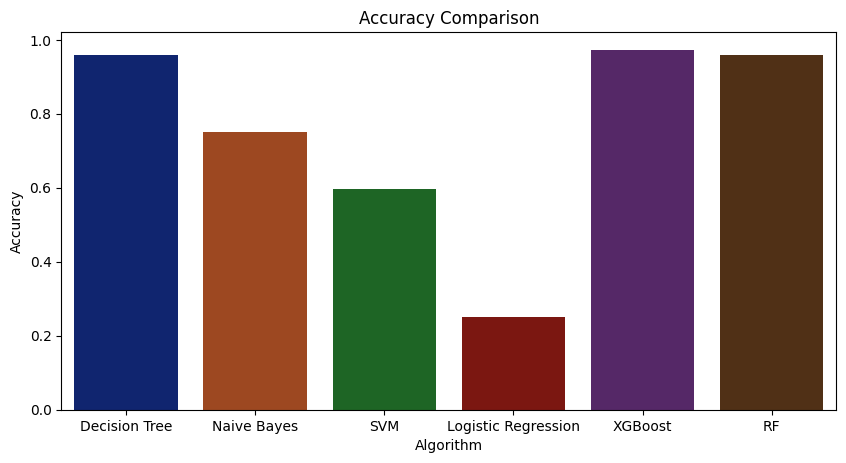

In [47]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc,palette='dark')

In [20]:
import pandas as pd
import pickle
data = [[20201130,23,32,24,0,53,34,344,23,0.3]]
df = pd.DataFrame(data, columns = ['variable', 'Temperature','Relative Humidity','Precipitation Total', 'Snowfall Amount', 'Evapotranspiration','Wind Speed','Wind Direction','Soil Temperature','Soil Moisture'])
model=pickle.load(open('decision.pkl','rb'))
h=model.predict(data)
print(h)


[2]
